<a href="https://colab.research.google.com/github/waelrash1/predictive_analytics_DT302/blob/main/Bias_Variance_tradeoff_simultion_Py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bais-Variance Tradeoff Simulation

This notebook is adapted from https://daviddalpiaz.github.io/r4sl/biasvariance-tradeoff.html

We will illustrate these decompositions, most importantly the bias-variance tradeoff, through simulation. Suppose we would like to train a model to learn the true regression function function  $f(x)= x^2$

In [3]:
def f(x):
  return x**2

In [4]:
f(5)

25

More specifically, we’d like to predict an observation,  $Y$, given that  $X=x$
  by using   $\hat{f}(x)$ where

$E[Y∣X=x]=f(x)=x^2$
 

and

$V[Y∣X=x]=σ^2$.
 

Alternatively, we could write this as $Y=f(X)+ \epsilon $ where $ E[\epsilon] = 0$ and $V[\epsilon]=\sigma^2$.
 
In this formulation, we call  $f(x)$ the signal and $\epsilon$ the noise.

Also note that if you prefer to think of this situation using the $Y=f(X)+\epsilon$ formulation, the following code represents the same data generating process.

To carry out a concrete simulation example, we need to fully specify the data generating process. We do so with the following code.

In [33]:
from numpy.random.mtrand import RandomState
def get_sim_data(f, sample_size = 100):
  import numpy as np
  import pandas as pd
  np.random.seed(1)
  x= np.random.random_sample(size= sample_size)
  eps= np.random.normal(loc=0, scale=0.3, size= sample_size)
  y=f(x) + eps
  d = {'X': x, 'Y': y}
  data= pd.DataFrame(d)
  return data


# Generate data/fitting models
we will generate datasets,  $D$, with a sample size  $n=100$ and fit four models.

1- $ predict (model_{0}, x) = \hat{f}_{0}(X)= \hat{\beta_{0}}$

2- $ predict (model_{1}, x) = \hat{f}_{1}(X)= \hat{\beta_{0}}+\hat{\beta_{1}}x$

3- $ predict (model_{2}, x) = \hat{f}_{2}(X)= \hat{\beta_{0}}+\hat{\beta_{1}}x+\hat{\beta_{2}}x^2$

4- $ predict (model_{3}, x) = \hat{f}_{3}(X)= \hat{\beta_{0}}+ \hat{\beta_{1}}x+\hat{\beta_{2}}x^2+\hat{\beta_{3}}x^3...+\hat{\beta_{9}}x^9$


To get a sense of the data and these four models, we generate one simulated dataset, and fit the four models.

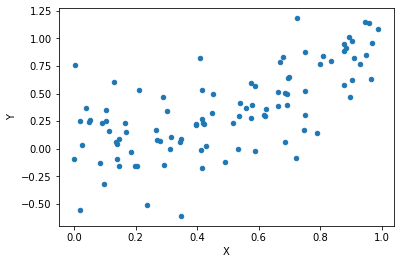

In [34]:
import matplotlib.pyplot as plt
df=get_sim_data(f)
df.plot(x ='X', y='Y',kind= 'scatter')

In [50]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
X=df["X"]
y=df["Y"]

# Note the difference in argument order
model0 = sm.OLS(y, X).fit()
predictions0 = model0.predict(X) # make the predictions by the model
# Print out the statistics
model0.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.690
Model:                            OLS   Adj. R-squared (uncentered):              0.687
Method:                 Least Squares   F-statistic:                              220.3
Date:                Mon, 24 Oct 2022   Prob (F-statistic):                    6.38e-27
Time:                        16:24:53   Log-Likelihood:                         -17.983
No. Observations:                 100   AIC:                                      37.97
Df Residuals:                      99   BIC:                                      40.57
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              0.7606      0.051     14.844      0.000       0.659       0.862
==============================================================================
Omnibus:                        1.144   Durbin-Watson:                   2.312
Prob(Omnibus):                  0.564   Jarque-Bera (JB):                0.680
Skew:                          -0.160   Prob(JB):                        0.712
Kurtosis:                       3.247   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
X=np.array(X).reshape(-1,1)
X2 = polynomial_features.fit_transform(X)
X2.shape


(100, 3)

In [59]:
model2 = sm.OLS(y, X2).fit()
predictions1 = model2.predict(X2) # make the predictions by the model
# Print out the statistics
model2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     53.49
Date:                Mon, 24 Oct 2022   Prob (F-statistic):           2.20e-16
Time:                        16:35:43   Log-Likelihood:                -9.7269
No. Observations:                 100   AIC:                             25.45
Df Residuals:                      97   BIC:                             33.27
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1297      0.075      1.722      0.088      -0.020       0.279
x1            -0.4715      0.361     -1.306      0.195      -1.188       0.245
x2             1.3860      0.357      3.877      0.000       0.677       2.096
==============================================================================
Omnibus:                        2.436   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                1.883
Skew:                          -0.198   Prob(JB):                        0.390
Kurtosis:                       3.543   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=9)
X=np.array(X).reshape(-1,1)
X9 = polynomial_features.fit_transform(X)
X9.shape
model9 = sm.OLS(y, X9).fit()
predictions9 = model9.predict(X9) # make the predictions by the model
# Print out the statistics
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     11.29
Date:                Mon, 24 Oct 2022   Prob (F-statistic):           1.24e-11
Time:                        16:36:26   Log-Likelihood:                -9.1163
No. Observations:                 100   AIC:                             38.23
Df Residuals:                      90   BIC:                             64.28
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1898      0.194      0.979      0.330      -0.195       0.575
x1            -4.4096     12.699     -0.347      0.729     -29.638      20.819
x2           100.7262    249.352      0.404      0.687    -394.654     596.107
x3         -1031.3780   2200.193     -0.469      0.640   -5402.445    3339.689
x4          5252.2310   1.04e+04      0.503      0.616   -1.55e+04     2.6e+04
x5         -1.482e+04    2.9e+04     -0.511      0.610   -7.24e+04    4.28e+04
x6          2.444e+04   4.83e+04      0.506      0.614   -7.16e+04     1.2e+05
x7          -2.35e+04   4.77e+04     -0.493      0.623   -1.18e+05    7.12e+04
x8          1.221e+04   2.56e+04      0.476      0.635   -3.87e+04    6.31e+04
x9         -2654.4782   5781.192     -0.459      0.647   -1.41e+04    8830.869
==============================================================================
Omnibus:                        2.162   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.339   Jarque-Bera (JB):                1.567
Skew:                          -0.216   Prob(JB):                        0.457
Kurtosis:                       3.436   Cond. No.                     3.68e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.26e-11. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
X=np.array(X).reshape(-1,1)
X2 = polynomial_features.fit_transform(X)
X2.shape
model_0 = lm(y ~ 1,data = sim_data)
model_1 = lm(y ~ poly(x, degree = 1), data = sim_data)
model_2 = lm(y ~ poly(x, degree = 2), data = sim_data)
model_9 = lm(y ~ poly(x, degree = 9), data = sim_data)

Plotting these four trained models, we see that the zero predictor model does very poorly. The first degree model is reasonable, but we can see that the second degree model fits much better. The ninth degree model seem rather wild.

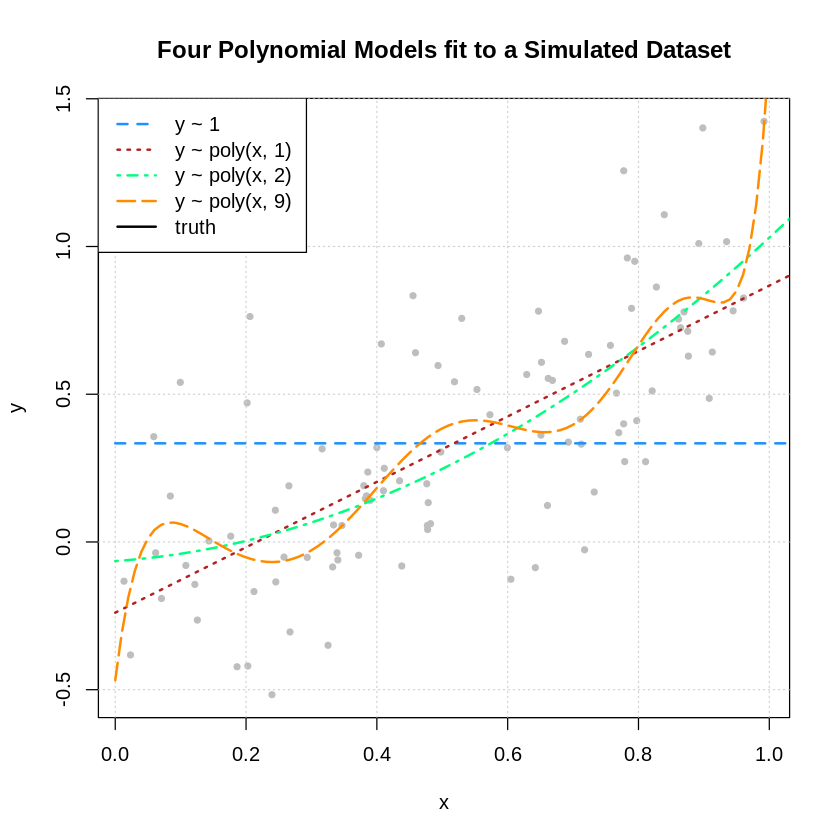

In [ ]:

 plot(y ~ x, data = sim_data, col = "grey", pch = 20,
     main = "Four Polynomial Models fit to a Simulated Dataset")
grid()
grid = seq(from = 0, to = 2, by = 0.01)
#lines(grid, f(grid), col = "black", lwd = 3)
lines(grid, predict(model_0, newdata = data.frame(x = grid)), col = "dodgerblue",  lwd = 2, lty = 2)
lines(grid, predict(model_1, newdata = data.frame(x = grid)), col = "firebrick",   lwd = 2, lty = 3)
lines(grid, predict(model_2, newdata = data.frame(x = grid)), col = "springgreen", lwd = 2, lty = 4)
lines(grid, predict(model_9, newdata = data.frame(x = grid)), col = "darkorange",  lwd = 2, lty = 5)

legend("topleft", 
       c("y ~ 1", "y ~ poly(x, 1)", "y ~ poly(x, 2)",  "y ~ poly(x, 9)", "truth"), 
       col = c("dodgerblue", "firebrick", "springgreen", "darkorange", "black"), lty = c(2, 3, 4, 5, 1), lwd = 2)


We will now complete a simulation study to understand the relationship between the bias, variance, and mean squared error for the estimates for $f(x)$ given by these four models at the point $x = 0.90$. We use simulation to complete this task, as performing the analytical calculations would prove to be rather tedious and difficult.


In [ ]:
set.seed(1)
n_sims = 250
n_models = 4
xnew = data.frame(x = 0.90) # fixed point at which we make predictions
predictions = matrix(0, nrow = n_sims, ncol = n_models)


In [ ]:
for (sim in 1:n_sims) {

  # simulate new, random, training data
  # this is the only random portion of the bias, var, and mse calculations
  # this allows us to calculate the expectation over D
  sim_data = get_sim_data(f)
  # fit models
  model_0 = lm(y ~ 1,data = sim_data)
  model_1 = lm(y ~ poly(x, degree = 1), data = sim_data)
  model_2 = lm(y ~ poly(x, degree = 2), data = sim_data)
  model_9 = lm(y ~ poly(x, degree = 9), data = sim_data)

  # get predictions for fixed point at x = 0.9
  predictions[sim, 1] = predict(model_0, xnew)
  predictions[sim, 2] = predict(model_1, xnew)
  predictions[sim, 3] = predict(model_2, xnew)
  predictions[sim, 4] = predict(model_9, xnew)
}


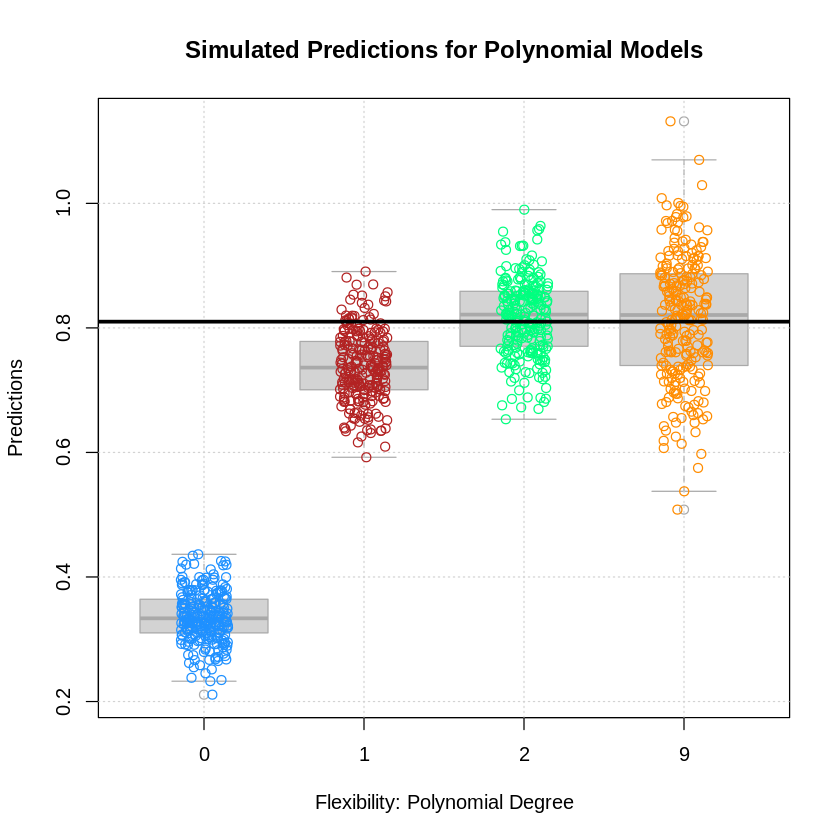

In [ ]:
#predictions = (predictions)
colnames(predictions) = c("0", "1", "2", "9")
predictions = as.data.frame(predictions)

# pivoting as key-value
tall_predictions = tidyr::gather(predictions, factor_key = TRUE)
#print(tall_predictions)
boxplot(value ~ key, data = tall_predictions, border = "darkgrey", xlab = "Flexibility: Polynomial Degree",
        ylab = "Predictions", main = "Simulated Predictions for Polynomial Models")

grid()

stripchart(value ~ key, data = tall_predictions, add = TRUE, vertical = TRUE, method = "jitter", 
           jitter = 0.15, pch = 1, col = c("dodgerblue", "firebrick", "springgreen", "darkorange"))
abline(h = f(x = 0.90), lwd = 3)

The above plot shows the predictions for each of the 250 simulations of each of the four models of different polynomial degrees. The truth, $f(x = 0.90) = (0.9)^2 = 0.81$, is given by the solid black horizontal line.

Two things are immediately clear:

- As complexity *increases*, **bias decreases**. (The mean of a model's predictions is closer to the truth.)
- As complexity *increases*, **variance increases**. (The variance about the mean of a model's predictions increases.)

The goal of this simulation study is to show that the following holds true for each of the four models.

$$
\text{MSE}\left(f(0.90), \hat{f}_k(0.90)\right) = 
\underbrace{\left(\mathbb{E} \left[ \hat{f}_k(0.90) \right] - f(0.90) \right)^2}_{\text{bias}^2 \left(\hat{f}_k(0.90) \right)} +
\underbrace{\mathbb{E} \left[ \left( \hat{f}_k(0.90) - \mathbb{E} \left[ \hat{f}_k(0.90) \right] \right)^2 \right]}_{\text{var} \left(\hat{f}_k(0.90) \right)}
$$

We'll use the empirical results of our simulations to estimate these 

---

quantities. (Yes, we're using estimation to justify facts about estimation.) 

---

 Note that we've actually used a rather small number of simulations. In practice we should use more, but for the sake of computation time, we've performed just enough simulations to obtain the desired results. (Since we're estimating estimation, the bigger the sample size, the better.)

To estimate the mean squared error of our predictions, we'll use

$$
\widehat{\text{MSE}}\left(f(0.90), \hat{f}_k(0.90)\right) = \frac{1}{n_{\texttt{sims}}}\sum_{i = 1}^{n_{\texttt{sims}}} \left(f(0.90) - \hat{f}_k(0.90) \right)^2
$$

In [ ]:
# function to get mse
get_mse = function(truth, estimate) {
  mean((estimate - truth) ^ 2)
    }

Similarly, for the bias of our predictions we use,

$$
\widehat{\text{bias}} \left(\hat{f}(0.90) \right)  = \frac{1}{n_{\texttt{sims}}}\sum_{i = 1}^{n_{\texttt{sims}}} \left(\hat{f}_k(0.90) \right) - f(0.90)
$$

In [ ]:
get_bias = function(estimate, truth) {
  mean(estimate) - truth
}

Lastly, for the variance of our predictions we have

$$
\widehat{\text{var}} \left(\hat{f}(0.90) \right) = \frac{1}{n_{\texttt{sims}}}\sum_{i = 1}^{n_{\texttt{sims}}} \left(\hat{f}_k(0.90) - \frac{1}{n_{\texttt{sims}}}\sum_{i = 1}^{n_{\texttt{sims}}}\hat{f}_k(0.90) \right)^2
$$

In [ ]:
get_var = function(estimate) {
  mean((estimate - mean(estimate)) ^ 2)
}

To quickly obtain these results for each of the four models, we utilize the apply() function.

In [ ]:
bias = apply(predictions, 2, get_bias, truth = f(x = 0.90))
variance = apply(predictions, 2, get_var)
mse = apply(predictions, 2, get_mse, truth = f(x = 0.90))



| Degree | Mean Squared Error | Bias Squared | Variance |
|:------:|:------------------:|:------------:|:--------:|
|   0    |      0.22643       |   0.22476    | 0.00167  |
|   1    |      0.00829       |   0.00508    | 0.00322  |
|   2    |      0.00387       |   0.00005    | 0.00381  |
|   9    |      0.01019       |   0.00002    | 0.01017  |

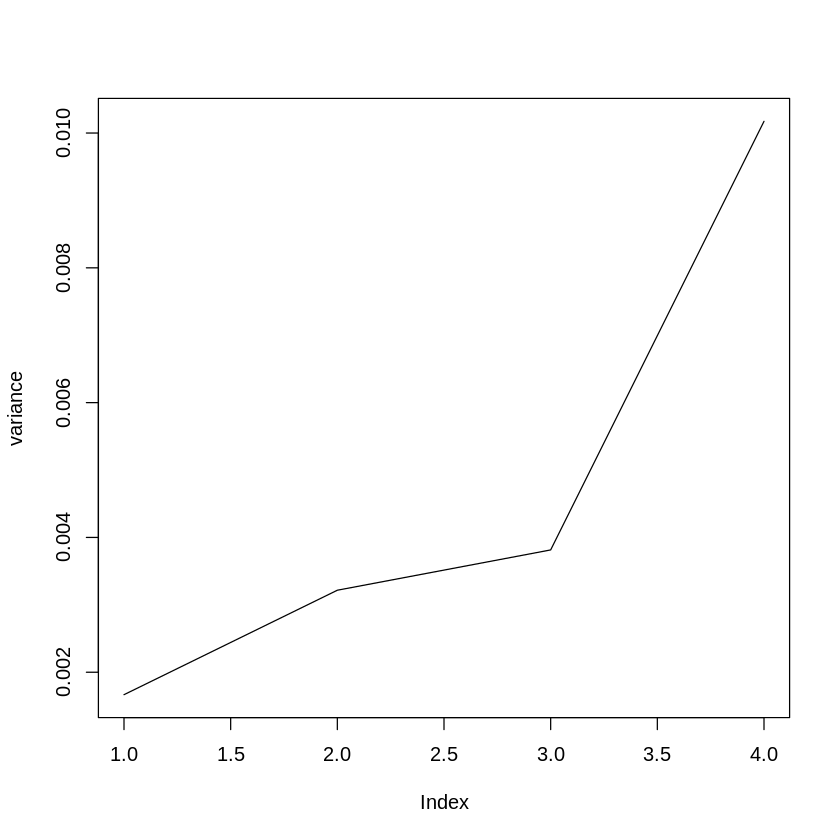

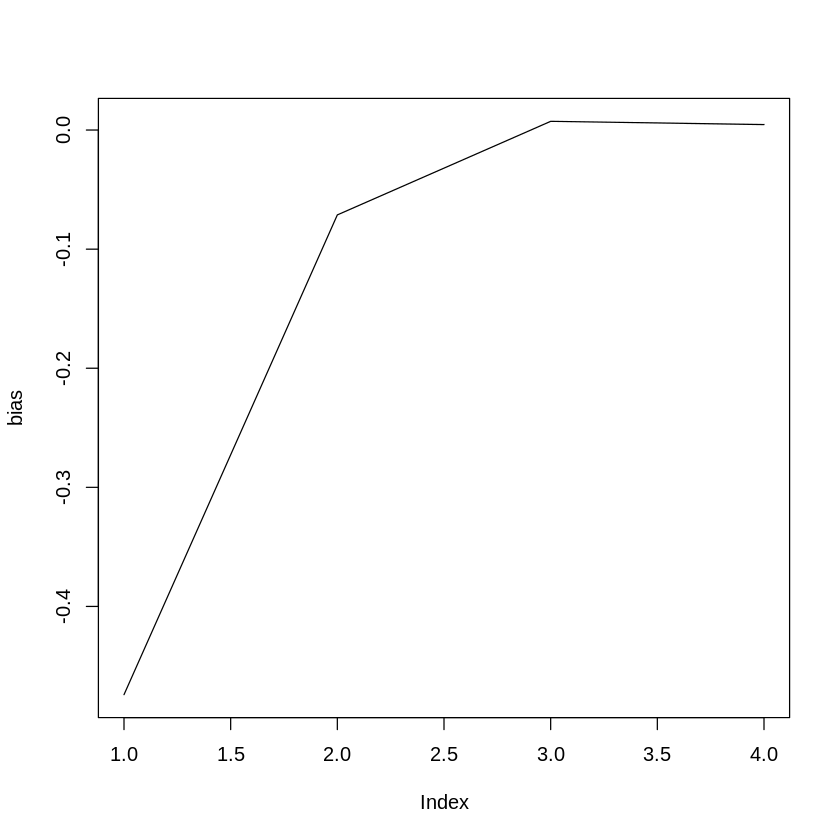

In [ ]:
results = data.frame(
  poly_degree = c(0, 1, 2, 9),
  round(mse, 5),
  round(bias ^ 2, 5),
  round(variance, 5)
)
colnames(results) = c("Degree", "Mean Squared Error", "Bias Squared", "Variance")
rownames(results) = NULL
knitr::kable(results, booktabs = TRUE, escape = TRUE, align = "c")

plot(variance,pch = 20,type = "l")
plot(bias,pch = 20,type = "l")

A number of things to notice here:

- We use squared bias in this table. Since bias can be positive or negative, squared bias is more useful for observing the trend as complexity increases. 
- The squared bias trend which we see here is **decreasing** as complexity increases, which we expect to see in general.
- The exact opposite is true of variance. As model complexity increases, variance **increases**.
- The mean squared error, which is a function of the bias and variance, decreases, then increases. This is a result of the bias-variance tradeoff. We can decrease bias, by increasing variance. Or, we can decrease variance by increasing bias. By striking the correct balance, we can find a good mean squared error!

In [ ]:
#Now we can finally verify the bias-variance decomposition.


all.equal(bias ^ 2 + variance, mse)

[1] TRUE